# Heart Desease prediction

## 1. Import Libraries

In [154]:
#install libraries needed
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install joblib

## 2. Load dataset & preview

In [155]:
# Load dataset & preview

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read from heart.csv to understand data
df = pd.read_csv('heart.csv')

print("Data Loaded Successfully!")
print(f"Original Shape: {df.shape} (Rows, Columns)")

# Preview first 5 rows
print("\n----- First 5 Rows -----")
display(df.head())

Data Loaded Successfully!
Original Shape: (1025, 14) (Rows, Columns)

----- First 5 Rows -----


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 3. Data preprosessing (remove if duplicate)

In [156]:
# Duplicate rows checking
duplicate_count = df.duplicated().sum()
print(f" Found {duplicate_count} duplicate rows.")

# Reomve if duplicate occured
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print(f" Duplicates removed. New Shape: {df.shape}")
else:
    print(" No duplicates found. Data is clean.")

 Found 723 duplicate rows.
 Duplicates removed. New Shape: (302, 14)


## 4. Missing value checking

In [157]:
missing_values = df.isnull().sum()
print("----- Missing Values Count -----")
print(missing_values[missing_values > 0])

if df.isnull().sum().sum() > 0:
    df.fillna(df.mean(), inplace=True)
    print("\n Missing values filled with column mean.")
else:
    print("\n No missing values detected.")

----- Missing Values Count -----
Series([], dtype: int64)

 No missing values detected.


## 5. Encode label to numeric form, checking rows 

In [158]:
cat_cols = df.select_dtypes(include=['object']).columns

print(f"Checking for categorical (text) variables...")

if len(cat_cols) > 0:
    # Encode if nessasary
    print(f"Found text columns: {list(cat_cols)}")
    print("Converting to numeric format (Label Encoding)...")
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    for col in cat_cols:
        df[col] = le.fit_transform(df[col])
else:
    # Print this if already numeric
    print(" All features are already numeric. No encoding needed.")

# Display current data types
print("\n----- Current Data Types -----")
print(df.dtypes)

Checking for categorical (text) variables...
 All features are already numeric. No encoding needed.

----- Current Data Types -----
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


## 6. Final dataset preview

In [159]:
print("----- Final Dataset Info -----")
df.info()

print("\n----- Final Data Preview -----")
display(df.head())

----- Final Dataset Info -----
<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB

----- Final Data Preview -----


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 7. Split & normalization

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define (x) & target (y)
X = df.drop(columns=['target'])
y = df['target']

# Split training & test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data Split & Normalized successfully.")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Data Split & Normalized successfully.
Training samples: 241
Testing samples: 61


## 8. Random forest classifier (RFC)

In [161]:
from sklearn.ensemble import RandomForestClassifier

# Model initialising
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Model training
print(" Training the model...")
rfc.fit(X_train, y_train)
print(" Model trained successfully!")

# Prediction
y_pred = rfc.predict(X_test)

 Training the model...
 Model trained successfully!


## 9. Model Accuracy (RFC)

In [162]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc*100:.2f}%")

Model Accuracy: 83.61%


## 10. Classification report (RFC)

In [163]:
from sklearn.metrics import classification_report

print("---------- Detailed Classification Report ----------")
print(classification_report(y_test, y_pred))

---------- Detailed Classification Report ----------
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.79      0.90      0.84        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



## 11. Confusion Matrix (RFC)

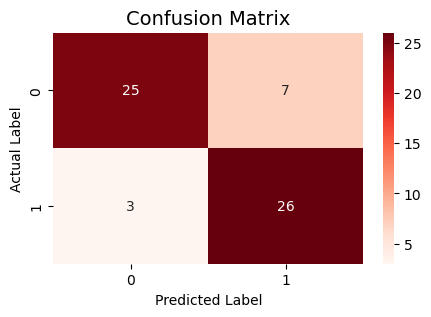

In [164]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix', fontsize=14)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## 12. Receiver operating characteristic (ROC) curve (RFC)

C:\Users\ujzfy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


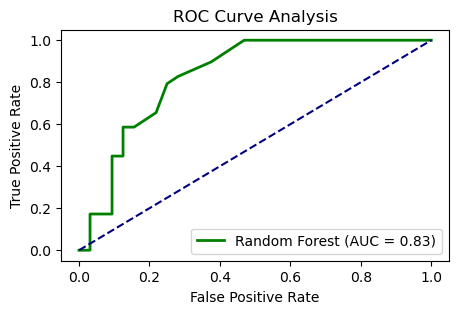

In [165]:
from sklearn.metrics import roc_curve, auc

# Probabilities
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Analysis')
plt.legend(loc="lower right")
plt.show()

## 13. Feature importance in (RFC)

C:\Users\ujzfy\AppData\Local\Temp\ipykernel_28440\4076697639.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=forest_importances.values, y=forest_importances.index, palette="viridis")


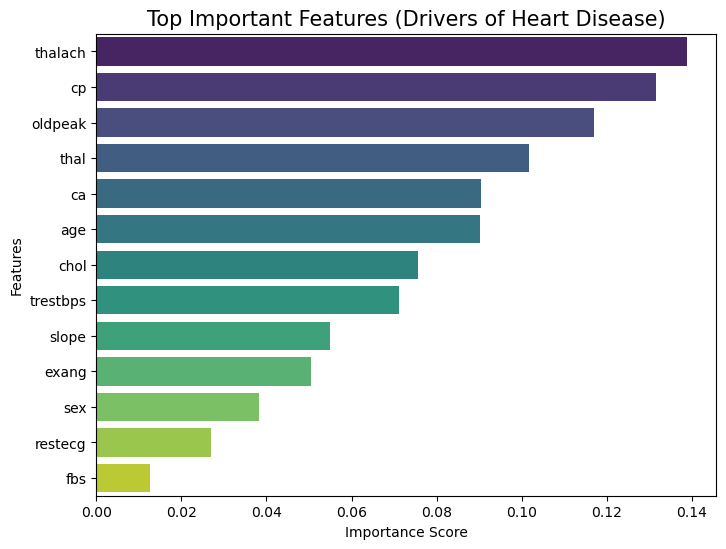

Top 3 Most Important Features:
thalach    0.138781
cp         0.131618
oldpeak    0.117095
dtype: float64


In [166]:
# Obtain important values
importances = model.feature_importances_
feature_names = X.columns

# Convert and sort to data frames
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=forest_importances.values, y=forest_importances.index, palette="viridis")

plt.title("Top Important Features (Drivers of Heart Disease)", fontsize=15)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Print top 3
print("Top 3 Most Important Features:")
print(forest_importances.head(3))

## 14. Support Vector Machines (SVM) 

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load Data
df = pd.read_csv('heart.csv').drop_duplicates()

# 2. Split Data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale Data (This defines X_train_scaled)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data loaded and scaled.")

Data loaded and scaled.


In [168]:
from sklearn.svm import SVC

# Train SVM classifier
# kernel='linear' is usually best for simple medical data. 
# probability=True is needed if you want to calculate AUC or show probabilities later.
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test_scaled)
y_proba_svm = svm.predict_proba(X_test_scaled)[:, 1]

print("SVM Model trained successfully.")

SVM Model trained successfully.


## 15. Classification report

In [169]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.79      0.90      0.84        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



## 16. Confusion Matrix (SVM)

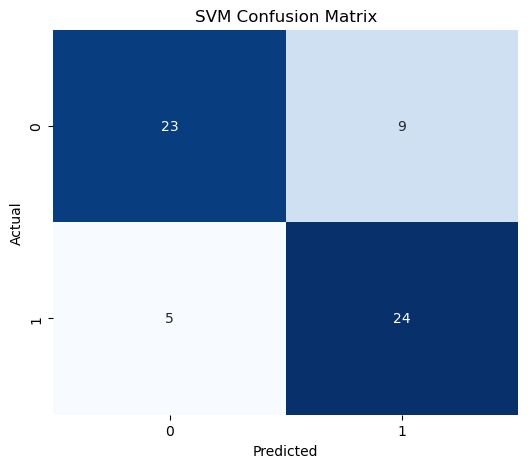

In [170]:
# Evaluation
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm, output_dict=True)
svm_cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 5))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 17. ROC Curve (SVM)

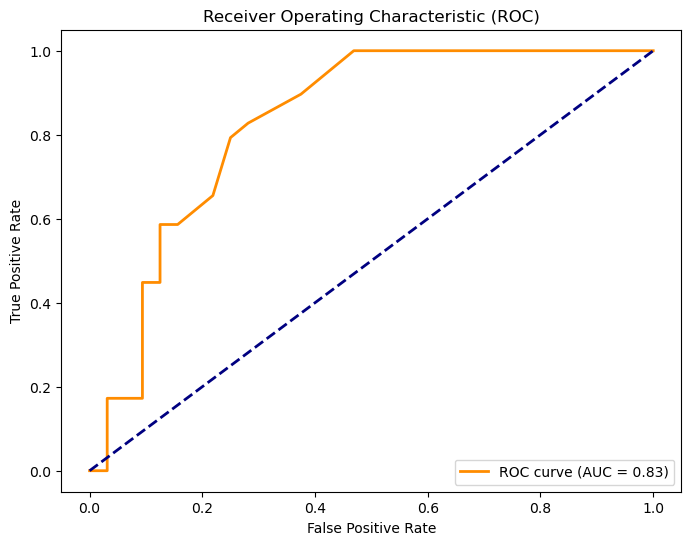

In [171]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## 18. Feature Coefficients (SVM)

C:\Users\ujzfy\AppData\Local\Temp\ipykernel_28440\2321224531.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')


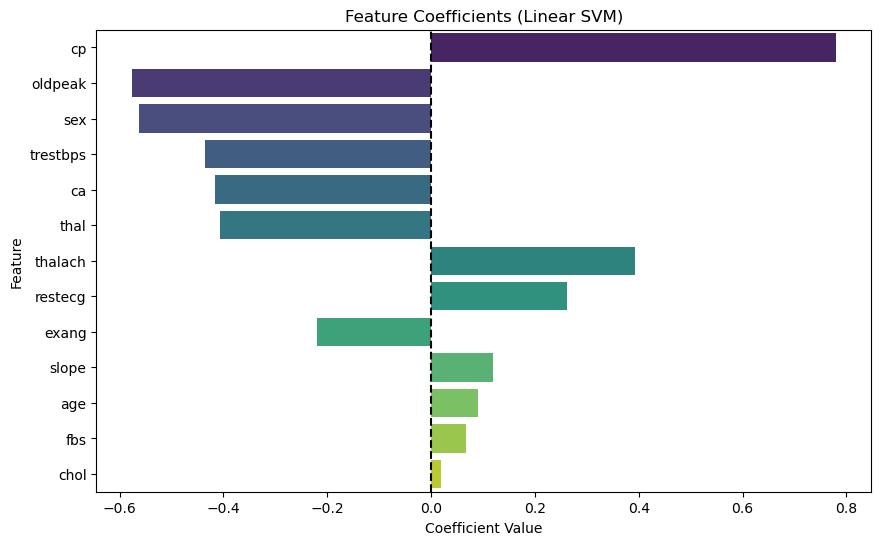

In [172]:
coefs = svm_model.coef_.flatten()
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Feature Coefficients (Linear SVM)')
plt.xlabel('Coefficient Value')
plt.axvline(x=0, color='black', linestyle='--')
plt.show()

## 19. Model Comparison

In [173]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Function to gather all metrics
def get_metrics(model, X_test, y_test):
    pred = model.predict(X_test)
    prob = model.predict_proba(X_test)[:, 1]
    return [
        accuracy_score(y_test, pred),
        precision_score(y_test, pred),
        recall_score(y_test, pred),
        f1_score(y_test, pred, pos_label=1),
        roc_auc_score(y_test, prob)
    ]

# Get scores
rfc_scores = get_metrics(rfc_model, X_test_scaled, y_test)
svm_scores = get_metrics(svm_model, X_test_scaled, y_test)

# Create DataFrame
df_compare = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score (Heart Disease)', 'AUC Score'],
    'Random Forest': rfc_scores,
    'SVM': svm_scores
})

df_compare.set_index('Metric', inplace=True)

# --- APPLY STYLING (The "Design" Part) ---
# 1. formatting: percentages
# 2. background_gradient: high numbers = brighter colors (viridis)
styled_table = df_compare.style.format("{:.2%}")\
    .background_gradient(cmap='viridis', axis=1)\
    .highlight_max(axis=1, props='font-weight:bold; border: 2px solid white;')

# Display
print("--- Model Performance Comparison ---")
display(styled_table)

--- Model Performance Comparison ---


,Random Forest,SVM
Metric,,
Accuracy,83.61%,77.05%
Precision,78.79%,72.73%
Recall,89.66%,82.76%
F1 Score (Heart Disease),83.87%,77.42%
AUC Score,87.88%,86.21%


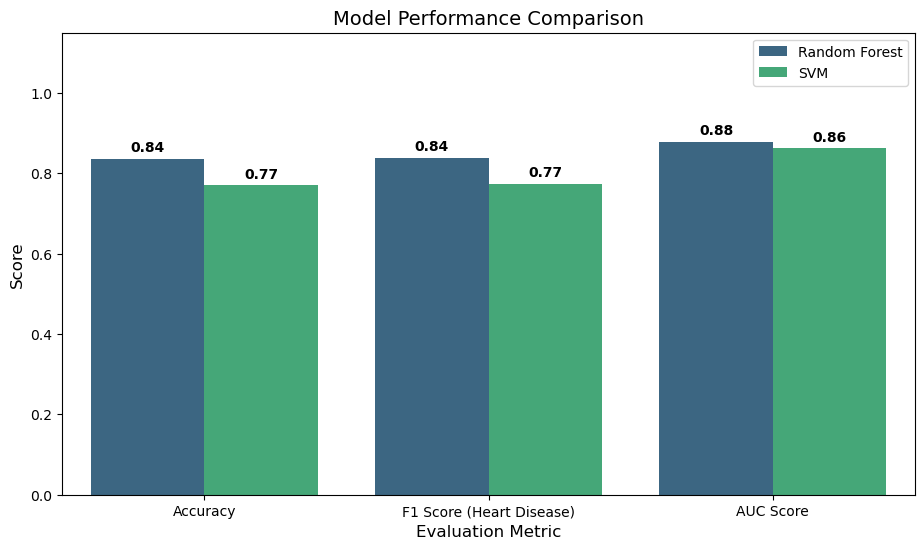

In [174]:
# --- 1. Calculate Metrics ---
# Predictions
rfc_pred = rfc_model.predict(X_test_scaled)
svm_pred = svm_model.predict(X_test_scaled)

# Probabilities (for AUC)
rfc_prob = rfc_model.predict_proba(X_test_scaled)[:, 1]
svm_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

# Store results in a list
# pos_label=1 ensures we get the F1 score for the 'Heart Disease' class
results = [
    {'Model': 'Random Forest', 'Metric': 'Accuracy', 'Score': accuracy_score(y_test, rfc_pred)},
    {'Model': 'Random Forest', 'Metric': 'F1 Score (Heart Disease)', 'Score': f1_score(y_test, rfc_pred, pos_label=1)},
    {'Model': 'Random Forest', 'Metric': 'AUC Score', 'Score': roc_auc_score(y_test, rfc_prob)},
    
    {'Model': 'SVM', 'Metric': 'Accuracy', 'Score': accuracy_score(y_test, svm_pred)},
    {'Model': 'SVM', 'Metric': 'F1 Score (Heart Disease)', 'Score': f1_score(y_test, svm_pred, pos_label=1)},
    {'Model': 'SVM', 'Metric': 'AUC Score', 'Score': roc_auc_score(y_test, svm_prob)}
]

# Convert to DataFrame
comparison_df = pd.DataFrame(results)

# --- 2. Plot Grouped Bar Chart ---
plt.figure(figsize=(11, 6))

# Grouped bar plot using 'viridis' to match your design
ax = sns.barplot(x='Metric', y='Score', hue='Model', data=comparison_df, palette='viridis')

# Add values on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, fontweight='bold')

# Styling
plt.title('Model Performance Comparison', fontsize=14)
plt.xlabel('Evaluation Metric', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1.15) # Add space for labels
plt.legend(loc='upper right')
plt.show()

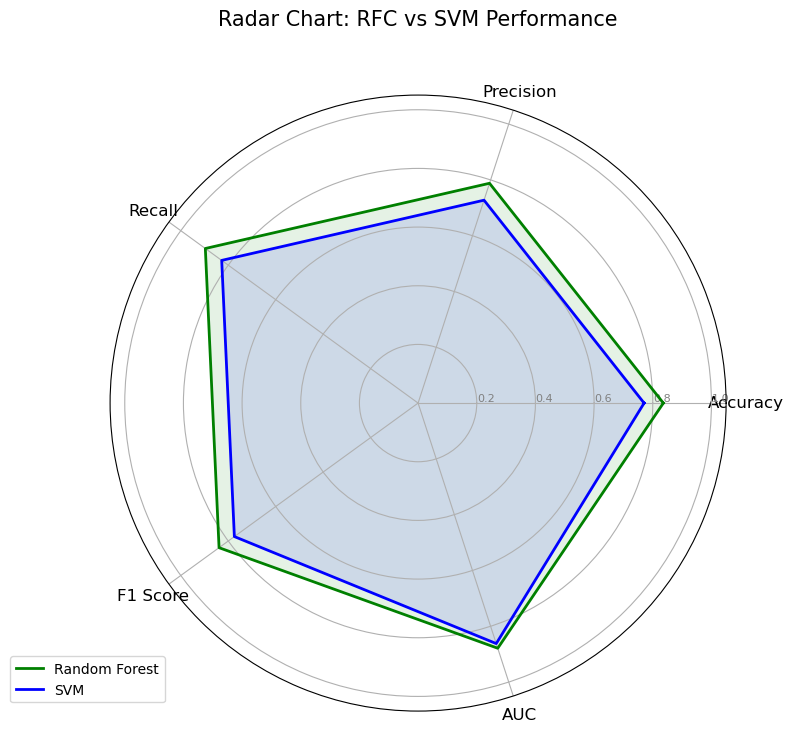

In [175]:
from math import pi

# 1. Prepare Data (RFC vs SVM)
# We assume 'rfc_scores' and 'svm_scores' are already calculated from previous steps.
# If not, we manually reconstruct the dataframe here for safety.
# [Accuracy, Precision, Recall, F1, AUC]
# Note: Ensure you have run the training cells before this!

data = {
    'Model': ['Random Forest', 'SVM'],
    'Accuracy': [accuracy_score(y_test, rfc.predict(X_test_scaled)), accuracy_score(y_test, svm.predict(X_test_scaled))],
    'Precision': [precision_score(y_test, rfc.predict(X_test_scaled)), precision_score(y_test, svm.predict(X_test_scaled))],
    'Recall': [recall_score(y_test, rfc.predict(X_test_scaled)), recall_score(y_test, svm.predict(X_test_scaled))],
    'F1 Score': [f1_score(y_test, rfc.predict(X_test_scaled), pos_label=1), f1_score(y_test, svm.predict(X_test_scaled), pos_label=1)],
    'AUC': [roc_auc_score(y_test, rfc.predict_proba(X_test_scaled)[:, 1]), roc_auc_score(y_test, svm.predict_proba(X_test_scaled)[:, 1])]
}

radar_df = pd.DataFrame(data)

# 2. Radar Chart Setup
categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
N = len(categories)

# What will be the angle of each axis in the plot?
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1] # Close the circle

# Initialize the plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=12)

# Draw ylabels (Grid circles)
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=8)
plt.ylim(0, 1.05)

# 3. Plot Data
# Loop through the dataframe to plot each model
colors = ['green', 'blue'] # RFC=Green, SVM=Blue

for i, row in radar_df.iterrows():
    values = row[categories].values.flatten().tolist()
    values += values[:1] # Close the circle
    
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=row['Model'], color=colors[i])
    ax.fill(angles, values, colors[i], alpha=0.1)

# Add Legend & Title
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Radar Chart: RFC vs SVM Performance", size=15, y=1.1)

plt.show()